In [1]:
import pandas as pd
from llama_index.query_engine.pandas_query_engine import PandasQueryEngine
from dotenv import load_dotenv
import os
import openai
load_dotenv()
api_key = os.getenv('OPENAI_API_KEY')
openai.api_key = api_key


In [2]:
df = pd.read_csv('cleaned_merged_seasons.csv')
df.head()

C:\Users\jaide\AppData\Local\Temp\ipykernel_14756\2940553115.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_merged_seasons.csv')


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,1.0,0.0,1,0,0,0,45,True,1,1


### Conduct Simple Data Analysis

In [3]:
query_engine = PandasQueryEngine(df=df, verbose=True)
response = query_engine.query(
    "List the columns with missing values and the number of missing values. Only show missing values columns.",
)

> Pandas Instructions:
```
df.isnull().sum()[df.isnull().sum() > 0]
```
df.isnull().sum()[df.isnull().sum() > 0]
> Pandas Output: team_x    19852
dtype: int64


In [4]:
response = query_engine.query(
    "Which player has the most creativity score over all seasons",
)

> Pandas Instructions:
```
eval("df.groupby('name')['creativity'].sum().idxmax()")
```
eval("df.groupby('name')['creativity'].sum().idxmax()")
> Pandas Output: Kevin De Bruyne


### Simplify Data Visualization

eval("df.groupby('name')['total_points'].sum().nlargest(10).plot(kind='bar')")


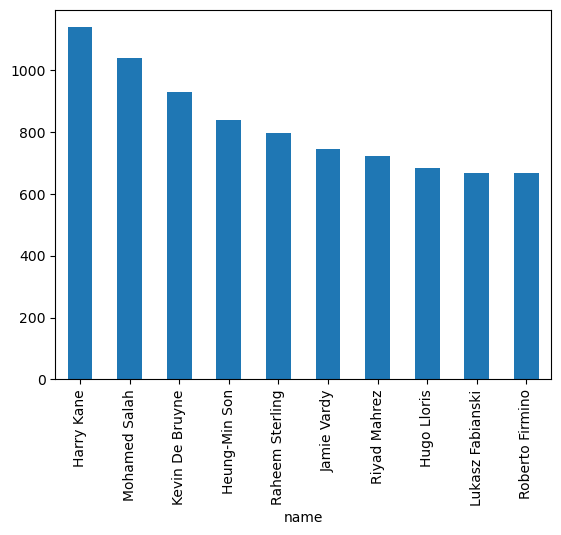

In [6]:
import pandas as pd
query_engine = PandasQueryEngine(df=df)
response = query_engine.query(
    "Visualize bar chart of top 10 players and total points accummalated over all seasons",
)


<Axes: xlabel='age'>

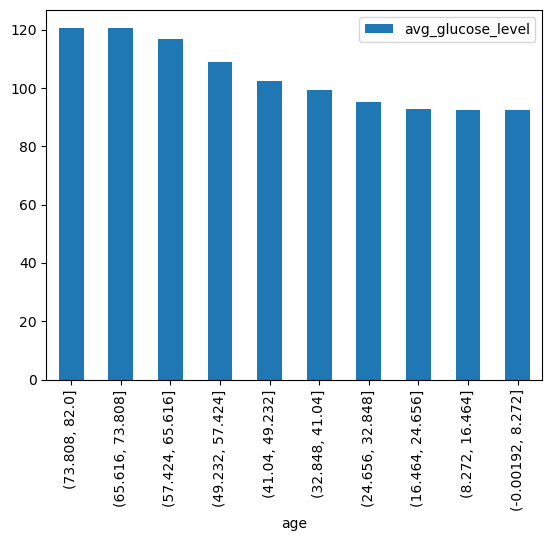

In [46]:
eval("df.groupby(pd.cut(df['age'], bins=10)).agg({'avg_glucose_level': 'mean'}).sort_values('avg_glucose_level', ascending=False).head(10).plot(kind='bar')")